<a href="https://colab.research.google.com/github/matheusfigueiredoo/COBOT_2023-24/blob/main/%5B2%5D_bin_mqttset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/drive


# Pre processing data

In [2]:
train = pd.read_csv("drive/MyDrive/MQTTset/train70_augmented.csv")
test = pd.read_csv("drive/MyDrive/MQTTset/test30_augmented.csv")
train = pd.DataFrame(train)
test = pd.DataFrame(test)

# new data shape
print(train['target'].value_counts())
print(test['target'].value_counts())

target
legitimate    7000000
bruteforce    1400000
flood         1400000
slowite       1400000
dos           1400000
malformed     1400000
Name: count, dtype: int64
target
legitimate    3000000
dos            600000
slowite        600000
flood          600000
bruteforce     600000
malformed      600000
Name: count, dtype: int64


In [3]:
print(train['mqtt.conack.flags.reserved'].unique())
print(train['mqtt.conack.flags.sp'].unique())
print(train['mqtt.conflag.qos'].unique())
print(train['mqtt.conflag.reserved'].unique())
print(train['mqtt.conflag.retain'].unique())
print(train['mqtt.conflag.willflag'].unique())
print(train['mqtt.sub.qos'].unique())
print(train['mqtt.suback.qos'].unique())
print(train['mqtt.willmsg'].unique())
print(train['mqtt.willmsg_len'].unique())
print(train['mqtt.willtopic'].unique())
print(train['mqtt.willtopic_len'].unique())

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [4]:
# columns_0 are columns with values equal to 0
columns_0 = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len']

train = train.drop(columns_0, axis=1)
test = test.drop(columns_0, axis=1)

# new data shape
print(train.shape)
print(test.shape)

(14000000, 22)
(6000000, 22)


In [5]:
# data balancing

# train
for i in train.index:
    if train['target'][i] != 'legitimate':
        train.at[i, 'target'] = 'malicious'

# test
for i in test.index:
    if test['target'][i] != 'legitimate':
        test.at[i, 'target'] = 'malicious'

# new data shape
print(train['target'].value_counts())
print(test['target'].value_counts())

target
legitimate    7000000
malicious     7000000
Name: count, dtype: int64
target
malicious     3000000
legitimate    3000000
Name: count, dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# features and target
train['tcp.flags'] = label.fit_transform(train['tcp.flags'])
train['mqtt.conack.flags'] = label.fit_transform(train['mqtt.conack.flags'])
train['mqtt.hdrflags'] = label.fit_transform(train['mqtt.hdrflags'])
train['mqtt.protoname'] = label.fit_transform(train['mqtt.protoname'])
train['mqtt.msg'] = label.fit_transform(train['mqtt.msg'])
train['mqtt.conflags'] = label.fit_transform(train['mqtt.conflags'])
train['target'] = label.fit_transform(train['target'])

test['tcp.flags'] = label.fit_transform(test['tcp.flags'])
test['mqtt.conack.flags'] = label.fit_transform(test['mqtt.conack.flags'])
test['mqtt.hdrflags'] = label.fit_transform(test['mqtt.hdrflags'])
test['mqtt.protoname'] = label.fit_transform(test['mqtt.protoname'])
test['mqtt.msg'] = label.fit_transform(test['mqtt.msg'])
test['mqtt.conflags'] = label.fit_transform(test['mqtt.conflags'])
test['target'] = label.fit_transform(test['target'])

In [7]:
X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

# convert to numpy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Gaussian Naive Bayes

Accuracy train:  0.674632
Cross-validation scores: [0.67445286 0.67468893 0.67496214 0.67481393 0.67424214]
Average cross-validation score: 0.67 

Accuracy test:  0.6746976666666666 

Classification report: 
              precision    recall  f1-score   support

           0       0.61      1.00      0.75   3000000
           1       1.00      0.35      0.52   3000000

    accuracy                           0.67   6000000
   macro avg       0.80      0.67      0.64   6000000
weighted avg       0.80      0.67      0.64   6000000
 

Confusion matrix:
 [[3000000       0]
 [1951814 1048186]] 



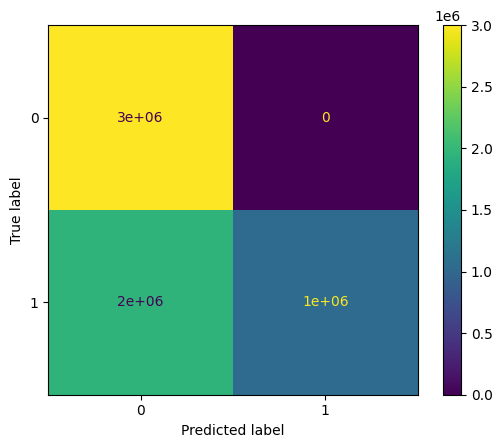

In [8]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy train: ", nb.score(X_train, y_train))
# cross validation
scores_nb = cross_val_score(nb, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores_nb))
print("Average cross-validation score: {:.2f}".format(scores_nb.mean()),"\n")

print("Accuracy test: ", nb.score(X_test, y_test), "\n")

# classification report
predict_nb = nb.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, predict_nb), "\n")

# confusion matrix
matrix_nb = confusion_matrix(y_test, predict_nb)
print("Confusion matrix:\n", matrix_nb, "\n")
cm_nb = confusion_matrix(y_test, predict_nb, labels=nb.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)
disp_nb.plot()
plt.show()

# Gradient Boosting

Accuracy train:  0.9548592142857143
Cross-validation scores: [0.95921964 0.95930286 0.95918893 0.95938964 0.95942821]
Average cross-validation score: 0.96 

Accuracy test:  0.954885 

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96   3000000
           1       0.96      0.95      0.95   3000000

    accuracy                           0.95   6000000
   macro avg       0.95      0.95      0.95   6000000
weighted avg       0.95      0.95      0.95   6000000
 

Confusion matrix:
 [[2882269  117731]
 [ 152959 2847041]] 



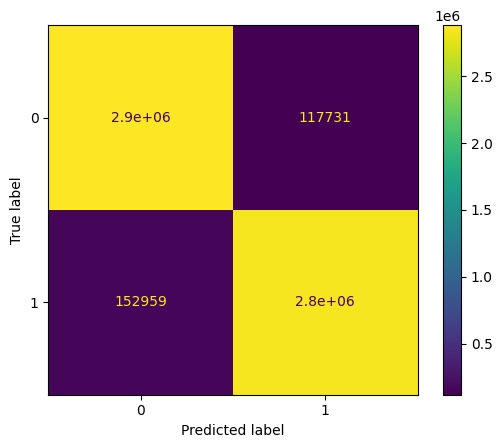

In [9]:
# gradient boosting

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print("Accuracy train: ", gb.score(X_train, y_train))
# cross validation
scores_gb = cross_val_score(gb, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores_gb))
print("Average cross-validation score: {:.2f}".format(scores_gb.mean()),"\n")

print("Accuracy test: ", gb.score(X_test, y_test), "\n")

# classification report
predict_gb = gb.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, predict_gb), "\n")

# confusion matrix
matrix_gb = confusion_matrix(y_test, predict_gb)
print("Confusion matrix:\n", matrix_gb, "\n")
cm_gb = confusion_matrix(y_test, predict_gb, labels=gb.classes_)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb.classes_)
disp_gb.plot()
plt.show()

# Sequential neural network

In [10]:
# # sequential neural network

# model = Sequential()
# model.add(Dense(50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
# model.add(Dense(30, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
# model.add(Dense(20, kernel_initializer='normal'))
# model.add(Dense(6,activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
# history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=200,batch_size=1000)

# y_pred_prob = model.predict(X_test)
# y_pred = np.argmax(y_pred_prob, axis=1)

# print("\n")
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy, "\n")

# print("Classification report:")
# print(classification_report(y_test, y_pred), "\n")

# # confusion matrix
# y_pred_prob = model.predict(X_test)
# y_pred = np.argmax(y_pred_prob, axis=1)
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Matriz de Confusão:")
# print(conf_matrix, "\n")

# plt.figure(figsize=(5, 5))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Classe ' + str(i) for i in range(conf_matrix.shape[0])],
#             yticklabels=['Classe ' + str(i) for i in range(conf_matrix.shape[0])])
# plt.xlabel('Classe Predita')
# plt.ylabel('Classe Verdadeira')
# plt.title('Matriz de Confusão')
# plt.show()

# print("\n")

# # lost and accuracy values while training
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']
# train_accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']

# # lost curves
# plt.figure(figsize=(5, 5))
# plt.plot(train_loss, label='Perda no Treinamento', color='blue')
# plt.plot(val_loss, label='Perda na Validação', color='red')
# plt.title('Curvas de Perda durante o Treinamento')
# plt.xlabel('Épocas')
# plt.ylabel('Perda')
# plt.legend()
# plt.grid(True)
# plt.show()
# print("\n")

# # accuracy curves
# plt.figure(figsize=(5, 5))
# plt.plot(train_accuracy, label='Acurácia no Treinamento', color='blue')
# plt.plot(val_accuracy, label='Acurácia na Validação', color='red')
# plt.title('Curvas de Acurácia durante o Treinamento')
# plt.xlabel('Épocas')
# plt.ylabel('Acurácia')
# plt.legend()
# plt.grid(True)
# plt.show()